# Outlier Detection

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from sklearn.datasets import load_boston

In [4]:
boston_dataset = load_boston()
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['MEDV'] = boston_dataset.target
input_feature = 'RM'

/home/gabry/Dataspell/LinearRegression/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

## Check for NaN values

In [4]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Percentiles Summary

## Interquartile range (IRQ-Score)

$$\large IQR = Q_3 - Q_1$$

$$\large x < (Q_1 - 1.5 IQR)$$
$$\large x > (Q_3 - 1.5 IQR)$$

In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
Q1 = boston_df.quantile(0.25)
Q2 = boston_df.quantile(0.50)
Q3 = boston_df.quantile(0.75)

In [6]:
IQR = Q3 - Q1

In [7]:
outliers_Q1 = boston_df[~(boston_df < (Q1-1.5*IQR))][input_feature]
print("Detected samples below the lower threshold {}".format(outliers_Q1.isnull().sum()))

Detected samples below the lower threshold 8


In [18]:
outliers_Q3 = boston_df[~(boston_df > (Q3+1.5*IQR))][input_feature]
print("Detected samples above the upper threshold {}".format(outliers_Q3.isnull().sum()))

Detected samples above the upper threshold 22


In [8]:
boston_IQR_outliers = boston_df[((boston_df < (Q1-1.5*IQR)) | (boston_df > (Q3+1.5*IQR)))[input_feature]]
boston_IQR_inliers = boston_df[~((boston_df < (Q1-1.5*IQR)) | (boston_df > (Q3+1.5*IQR)))[input_feature]]

In [32]:
boston_IQR_inliers.shape

(476, 14)

In [33]:
boston_IQR_outliers.shape

(30, 14)

# Scatterplot of Detected Outliers

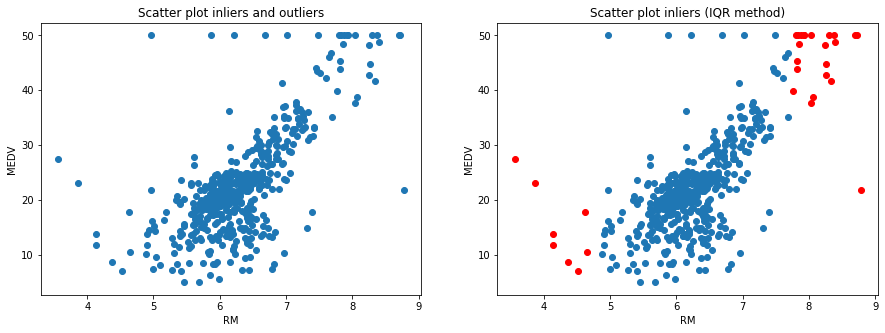

In [9]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.scatter(boston_df[input_feature].values, boston_df['MEDV'].values)
ax1.set_xlabel(input_feature)
ax1.set_ylabel("MEDV")
ax1.set_title("Scatter plot inliers and outliers")

ax2 = fig.add_subplot(122)
ax2.scatter(boston_IQR_inliers[input_feature],boston_IQR_inliers['MEDV'])
ax2.scatter(boston_IQR_outliers[input_feature], boston_IQR_outliers['MEDV'], c='r')
ax2.set_xlabel(input_feature)
ax2.set_ylabel("MEDV")
ax2.set_title("Scatter plot inliers (IQR method)")
plt.show()

# Fitting with only inliers

In [10]:
Q1 = boston_df.quantile(0.25)
Q2 = boston_df.quantile(0.50)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
boston_IQR_inliers = boston_df[~((boston_df < (Q1-1.5*IQR)) | (boston_df > (Q3+1.5*IQR)))[input_feature]]
X = boston_IQR_inliers[[input_feature]]
y = boston_IQR_inliers['MEDV'].values

In [11]:
def normalEquation(X,y):
    etime = -time.time()
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    etime += time.time()
    etime = np.round(etime*1000,3)
    return theta, etime

def polynomial_features(dataframe, degree):
    df = dataframe.copy()
    feature_name = dataframe.columns[0]
    for i in range(1,degree):
        key = "{}^{}".format(feature_name,i+1)
        df[key] = df[feature_name]**(i+1)
    return df

In [12]:
X_linear = np.c_[np.ones((X.shape[0],1)), X]
theta,etime = normalEquation(X_linear,y)

In [13]:
X_poly_2_scaled = polynomial_features(X,2)
X_poly_3_scaled = polynomial_features(X,3)
X_poly_4_scaled = polynomial_features(X,4)
X_poly_5_scaled = polynomial_features(X,5)
X_poly_6_scaled = polynomial_features(X,6)
X_poly_7_scaled = polynomial_features(X,7)
X_poly_8_scaled = polynomial_features(X,8)

In [14]:
X_poly_2_scaled_int = np.c_[np.ones((X_poly_2_scaled.shape[0],1)),X_poly_2_scaled]
X_poly_3_scaled_int = np.c_[np.ones((X_poly_3_scaled.shape[0],1)),X_poly_3_scaled]
X_poly_4_scaled_int = np.c_[np.ones((X_poly_4_scaled.shape[0],1)),X_poly_4_scaled]
X_poly_5_scaled_int = np.c_[np.ones((X_poly_5_scaled.shape[0],1)),X_poly_5_scaled]
X_poly_6_scaled_int = np.c_[np.ones((X_poly_6_scaled.shape[0],1)),X_poly_6_scaled]
X_poly_7_scaled_int = np.c_[np.ones((X_poly_7_scaled.shape[0],1)),X_poly_7_scaled]
X_poly_8_scaled_int = np.c_[np.ones((X_poly_8_scaled.shape[0],1)),X_poly_8_scaled]

In [15]:
theta_poly2, _ = normalEquation(X_poly_2_scaled_int,y)
theta_poly3, _ = normalEquation(X_poly_3_scaled_int,y)
theta_poly4, _ = normalEquation(X_poly_4_scaled_int,y)
theta_poly5, _ = normalEquation(X_poly_5_scaled_int,y)
theta_poly6, _ = normalEquation(X_poly_6_scaled_int,y)
theta_poly7, _ = normalEquation(X_poly_7_scaled_int,y)
theta_poly8, _ = normalEquation(X_poly_8_scaled_int,y)

In [16]:
X_2,yhat_2 = zip(*sorted(zip(X.values, X_poly_2_scaled_int.dot(theta_poly2))))
X_3,yhat_3 = zip(*sorted(zip(X.values, X_poly_3_scaled_int.dot(theta_poly3))))
X_4,yhat_4 = zip(*sorted(zip(X.values, X_poly_4_scaled_int.dot(theta_poly4))))
X_5,yhat_5 = zip(*sorted(zip(X.values, X_poly_5_scaled_int.dot(theta_poly5))))
X_6,yhat_6 = zip(*sorted(zip(X.values, X_poly_6_scaled_int.dot(theta_poly6))))
X_7,yhat_7 = zip(*sorted(zip(X.values, X_poly_7_scaled_int.dot(theta_poly7))))
X_8,yhat_8 = zip(*sorted(zip(X.values, X_poly_8_scaled_int.dot(theta_poly8))))

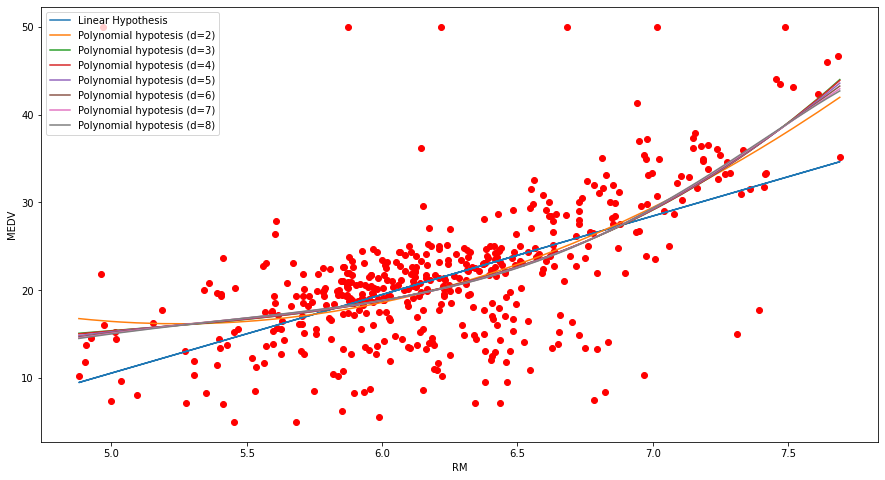

In [17]:
plt.figure(figsize=(15,8))
plt.xlabel(input_feature)
plt.ylabel('MEDV')
plt.scatter(X,y,c='r')
plt.plot(X.values,X_linear.dot(theta), label = 'Linear Hypothesis')
plt.plot(X_2,yhat_2, label = 'Polynomial hypotesis (d=2)')
plt.plot(X_3,yhat_3, label = 'Polynomial hypotesis (d=3)')
plt.plot(X_4,yhat_4, label = 'Polynomial hypotesis (d=4)')
plt.plot(X_5,yhat_5, label = 'Polynomial hypotesis (d=5)')
plt.plot(X_6,yhat_6, label = 'Polynomial hypotesis (d=6)')
plt.plot(X_7,yhat_7, label = 'Polynomial hypotesis (d=7)')
plt.plot(X_8,yhat_8, label = 'Polynomial hypotesis (d=8)')
plt.legend()
plt.show()